In [21]:
import subprocess
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

PATH_TO_INSTANCES = '../instances'
NB_SEEDS = 10

In [58]:
def run_file(nb_nodes=110, seed=0, algo='glouton'):
    exe = subprocess.run(['TP2.exe', '-e', f'{PATH_TO_INSTANCES}/{nb_nodes}_{seed}', '-a', algo, '-t'],
                     capture_output=True)
    if exe.returncode != 0:
        print(exe.stderr)
        raise Exception('TP2.exe failed')
    return float(exe.stdout.decode('utf-8'))

def run_algo(computed_times, df, algo, max_nb_nodes):
    for nb_nodes in tqdm(range(2, max_nb_nodes + 1)):
        for seed in range(NB_SEEDS):
            if (nb_nodes, seed, algo) not in computed_times:
                df.loc[df.shape[0]] = [nb_nodes, seed, algo, run_file(nb_nodes, seed, algo)]

def init():
    df = pd.read_csv('results.csv')
    computed_times = set()
    for index, row in df.iterrows():
        computed_times.add((row['nb_nodes'], row['seed'], row['algo']))
    return df, computed_times

In [59]:
df, computed_times = init()
run_algo(computed_times, df, 'branch_bound', 67)

100%|██████████| 66/66 [27:44<00:00, 25.22s/it] 


In [73]:
df.to_csv('results.csv', index=False)



tabu: 2-386
glouton: 2-(1000)
branch_bound: 2-68

In [40]:
def plot_cv_per_nb_nodes(df, algo):
    df_algo = df[df['algo'] == algo]
    std = df_algo.groupby('nb_nodes')['time'].std()
    mean = df_algo.groupby('nb_nodes')['time'].mean()
    cv = [s/m for s, m in zip(std, mean)]
    plt.plot(std.index, cv)
    plt.xlabel('nb_nodes')
    plt.ylabel('cv')
    plt.show()

def plot_std_per_nb_nodes(df, algo):
    df_algo = df[df['algo'] == algo]
    std = df_algo.groupby('nb_nodes')['time'].std()
    plt.plot(std.index, std.values)
    plt.xlabel('nb_nodes')
    plt.ylabel('std')
    plt.show()

def plot_mean_per_nb_nodes(df, algo):
    df_algo = df[df['algo'] == algo]
    mean = df_algo.groupby('nb_nodes')['time'].mean()
    plt.plot(mean.index, mean.values)
    plt.xlabel('nb_nodes')
    plt.ylabel('mean')
    plt.show()

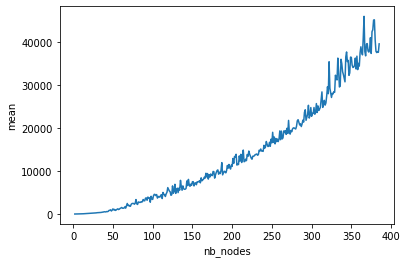

In [45]:
df = pd.read_csv('results.csv')
# plot_std_per_nb_nodes(df, 'glouton')
# plot_cv_per_nb_nodes(df, 'glouton')
plot_mean_per_nb_nodes(df, 'tabu')


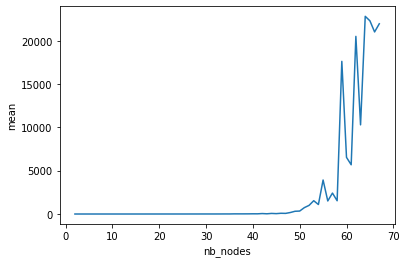

In [81]:
plot_mean_per_nb_nodes(df, 'branch_bound')